In [3]:
import numpy as np
import pandas as pd

#Imports qui serviront pour le prétraitement des données
import sklearn
import sklearn.metrics
import sklearn.cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration des données

In [5]:
smash=pd.read_csv('./datasets/smash.csv')

smash

,id,name,weight,recovery,speed,combo_game,projectiles,killpower,ledgetrap,edgeguard,spacing,cheese,popularity,pro_scene,online_winrate,easy
0,1,Mario,98,4,5,34,2,138,14,16,1,4.0,19500,7.844,47.58,2.920817
1,2,Donkey Kong,127,2,6,33,1,118,19,15,4,6.0,19700,4.149,51.51,2.728350
2,3,Link,104,5,4,25,5,133,23,14,4,3.0,18000,5.143,48.39,4.291500
3,4,Samus,108,6,4,23,5,148,29,23,2,4.0,24000,8.262,51.32,3.338767
4,5,Yoshi,104,7,6,29,2,133,13,18,2,5.0,21400,8.496,50.61,3.037117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,Steve,92,8,1,35,3,124,13,11,2,10.0,44100,10.474,60.04,5.295400
78,78,Sephiroth,79,6,4,25,3,132,15,27,5,6.0,20400,6.722,44.17,3.966500
79,79,Pyra Mythra,95,3,8,30,2,144,18,13,5,8.0,35300,9.631,45.07,2.462500
80,80,Kazuya,113,5,1,46,2,116,10,7,1,10.0,22100,8.638,53.49,5.680700


In [6]:
smash_names=smash.iloc[:, 1] #Pour récupérer les noms des personnages
smash_names

0           Mario
1     Donkey Kong
2            Link
3           Samus
4           Yoshi
         ...     
77          Steve
78      Sephiroth
79    Pyra Mythra
80         Kazuya
81           Sora
Name: name, Length: 82, dtype: object

In [7]:
smash.describe() #Description des données

,id,weight,recovery,speed,combo_game,projectiles,killpower,ledgetrap,edgeguard,spacing,cheese,popularity,pro_scene,online_winrate,easy
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,52.585366,95.756098,5.426829,4.475610,29.853659,2.926829,133.097561,16.195122,21.097561,3.000000,5.592256,15692.682927,6.323512,49.742683,3.933870
std,71.829007,13.485759,2.137441,1.913084,4.784548,1.412296,10.237440,6.553557,11.518755,1.422916,2.782100,8588.332316,2.047587,4.876817,0.968905
min,1.000000,62.000000,1.000000,1.000000,20.000000,1.000000,111.000000,2.000000,1.000000,1.000000,1.000000,4000.000000,1.467000,37.540000,2.237600
25%,21.250000,88.000000,4.000000,3.000000,27.000000,2.000000,126.000000,12.000000,12.250000,2.000000,3.000000,8750.000000,4.698750,45.880000,3.209358
50%,43.500000,95.000000,5.000000,4.000000,29.000000,3.000000,133.000000,15.500000,20.000000,3.000000,6.000000,13850.000000,6.383500,50.495000,3.721267
75%,63.750000,104.000000,7.000000,6.000000,33.000000,4.000000,139.000000,20.750000,28.750000,4.000000,8.000000,21375.000000,7.853000,53.007500,4.719358
max,600.000000,135.000000,9.000000,9.000000,46.000000,5.000000,162.000000,42.000000,55.000000,5.000000,10.000000,44100.000000,10.474000,60.040000,6.206133


On enlève les noms et id pour avoir uniquement les features qui seront potentiellement utilisées :

In [8]:
smash_features=smash.drop(columns=['name', 'id'])
smash_features

,weight,recovery,speed,combo_game,projectiles,killpower,ledgetrap,edgeguard,spacing,cheese,popularity,pro_scene,online_winrate,easy
0,98,4,5,34,2,138,14,16,1,4.0,19500,7.844,47.58,2.920817
1,127,2,6,33,1,118,19,15,4,6.0,19700,4.149,51.51,2.728350
2,104,5,4,25,5,133,23,14,4,3.0,18000,5.143,48.39,4.291500
3,108,6,4,23,5,148,29,23,2,4.0,24000,8.262,51.32,3.338767
4,104,7,6,29,2,133,13,18,2,5.0,21400,8.496,50.61,3.037117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,92,8,1,35,3,124,13,11,2,10.0,44100,10.474,60.04,5.295400
78,79,6,4,25,3,132,15,27,5,6.0,20400,6.722,44.17,3.966500
79,95,3,8,30,2,144,18,13,5,8.0,35300,9.631,45.07,2.462500
80,113,5,1,46,2,116,10,7,1,10.0,22100,8.638,53.49,5.680700


### Différentes représentations graphiques des données

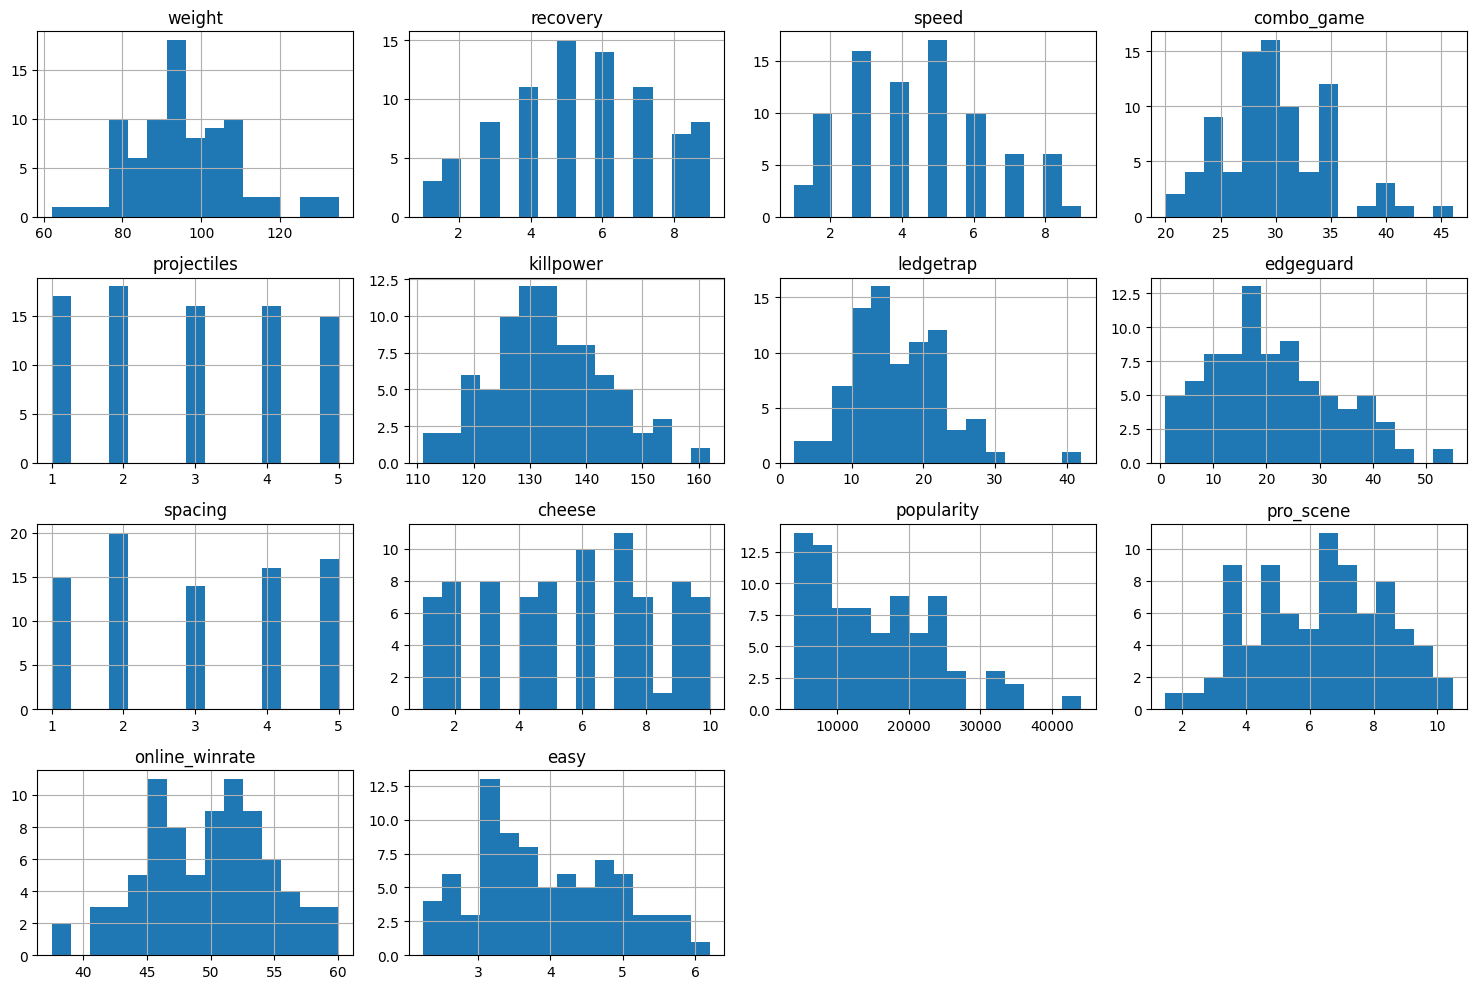

In [9]:
#Histogrammes des features

smash_features.hist(bins=15,  figsize=(15, 10))
plt.tight_layout()
plt.show()

# Prétraitement des données

On utilise une matrice de corrélation pour déterminer quelles features utiliser. Ici, on s'intéresse à celles qui ont le plus d'importance pour pro_scene et online_winrate.

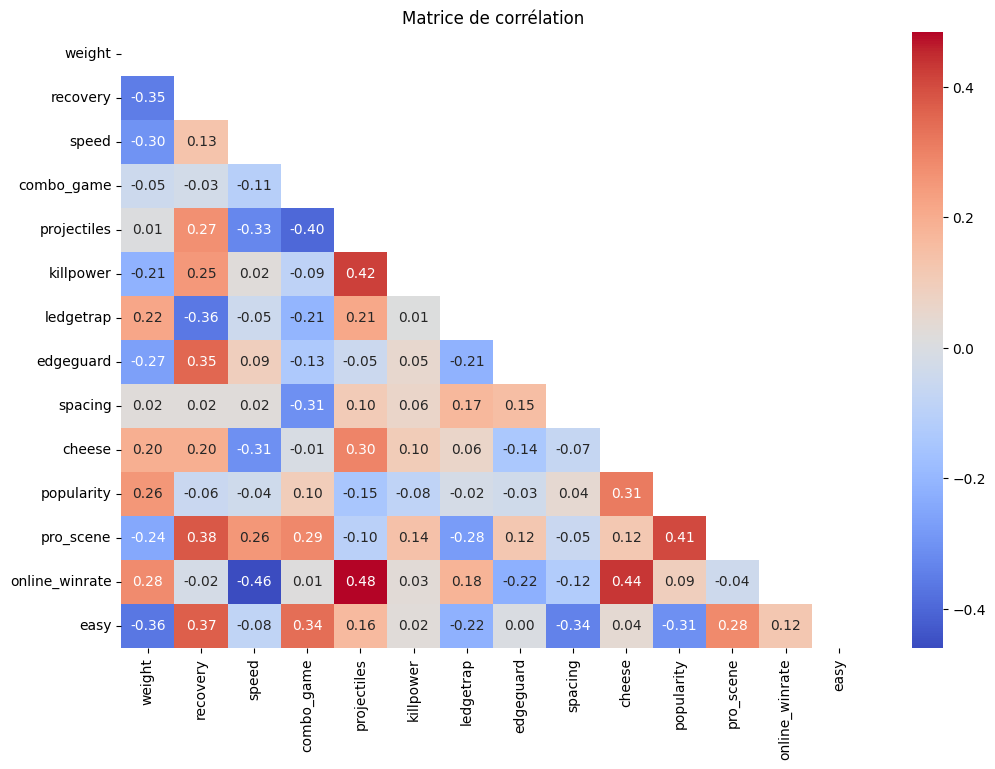

In [10]:
# Matrice de corrélation
corr_matrice = smash_features.corr()

#On récupère unqiuement le triangle inférieur de la matrice
corr_sup = np.triu(corr_matrice) 


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrice, mask=corr_sup, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

Après avoir obtenu la matrice de corrélation, on s'intéresse à toutes les features qui ont une valeur supérieure ou inférieure à 0.2, comme ce sont celles qui présentent le plus d'influence à pro_scene et online_winrate.

In [11]:
pro_scene=np.abs(corr_matrice['pro_scene'].drop("pro_scene", axis=0))
online_win=np.abs(corr_matrice['online_winrate'].drop("online_winrate", axis=0))

features_names_p=pro_scene[pro_scene > 0.2]
features_names_o=online_win[online_win > 0.2]
print(f"Les features importantes pour pro_scene sont : {features_names_p.index.to_list()}")
print(f"Les features importantes pour online_winrate sont : {features_names_o.index.to_list()}\n")
features_names=pd.concat([features_names_o, features_names_p])

features_names=features_names.index.unique().to_list()

print(f"Les features sélectionnées : {features_names}")


Les features importantes pour pro_scene sont : ['weight', 'recovery', 'speed', 'combo_game', 'ledgetrap', 'popularity', 'easy']
Les features importantes pour online_winrate sont : ['weight', 'speed', 'projectiles', 'edgeguard', 'cheese']

Les features sélectionnées : ['weight', 'speed', 'projectiles', 'edgeguard', 'cheese', 'recovery', 'combo_game', 'ledgetrap', 'popularity', 'easy']


In [12]:
smash_c=smash.copy() #Copie du DataFrame pour effectuer les opérations sans changer le dataset de base

In [13]:
features_used=smash_features[features_names] #Pour récupérer uniquement les features choisies

#Normalisation des données (standard)
norm = StandardScaler()
smash_normalized = norm.fit_transform(features_used)

#DataFrame avec les données normalisées
smash_f_normalized=pd.DataFrame(smash_normalized, columns=features_used.columns)
smash_f_normalized

,weight,speed,projectiles,edgeguard,cheese,recovery,combo_game,ledgetrap,popularity,easy
0,0.167414,0.275794,-0.660296,-0.445268,-0.575844,-0.671649,0.871944,-0.337012,0.446041,-1.051999
1,2.331064,0.801727,-1.372720,-0.532617,0.147462,-1.613105,0.661652,0.430627,0.469472,-1.251865
2,0.615066,-0.250139,1.476977,-0.619966,-0.937497,-0.200921,-1.020687,1.044739,0.270310,0.371379
3,0.913501,-0.250139,1.476977,0.166177,-0.575844,0.269808,-1.441272,1.965906,0.973232,-0.617982
4,0.615066,0.801727,-0.660296,-0.270569,-0.214191,0.740536,-0.179518,-0.490540,0.668633,-0.931228
...,...,...,...,...,...,...,...,...,...,...
77,-0.280237,-1.827937,0.052129,-0.882014,1.594073,1.211264,1.082236,-0.490540,3.328019,1.413873
78,-1.250149,-0.250139,0.052129,0.515573,0.147462,0.269808,-1.020687,-0.183485,0.551479,0.033884
79,-0.056411,1.853593,-0.660296,-0.707315,0.870767,-1.142377,0.030774,0.277099,2.297067,-1.527936
80,1.286544,-1.827937,-0.660296,-1.231410,1.594073,-0.200921,3.395452,-0.951124,0.750640,1.813985


La colonne "popularity" ne me semblait pas pertinente étant donnée qu'elle ne représentait rien du personnage. On l'enlève donc :

In [14]:
data=smash_f_normalized.drop(columns=['popularity'])

In [15]:
data

,weight,speed,projectiles,edgeguard,cheese,recovery,combo_game,ledgetrap,easy
0,0.167414,0.275794,-0.660296,-0.445268,-0.575844,-0.671649,0.871944,-0.337012,-1.051999
1,2.331064,0.801727,-1.372720,-0.532617,0.147462,-1.613105,0.661652,0.430627,-1.251865
2,0.615066,-0.250139,1.476977,-0.619966,-0.937497,-0.200921,-1.020687,1.044739,0.371379
3,0.913501,-0.250139,1.476977,0.166177,-0.575844,0.269808,-1.441272,1.965906,-0.617982
4,0.615066,0.801727,-0.660296,-0.270569,-0.214191,0.740536,-0.179518,-0.490540,-0.931228
...,...,...,...,...,...,...,...,...,...
77,-0.280237,-1.827937,0.052129,-0.882014,1.594073,1.211264,1.082236,-0.490540,1.413873
78,-1.250149,-0.250139,0.052129,0.515573,0.147462,0.269808,-1.020687,-0.183485,0.033884
79,-0.056411,1.853593,-0.660296,-0.707315,0.870767,-1.142377,0.030774,0.277099,-1.527936
80,1.286544,-1.827937,-0.660296,-1.231410,1.594073,-0.200921,3.395452,-0.951124,1.813985


# Partie Clustering

In [ ]:
def cherche_nb_clusters(data, k, graphe=False, verbose=False):
    """ Recherche du nombre de clusters à faire grâce au silhouette score, affiche une courbe de ceux-ci et retourne le k où le score est maximisé
        Arguements :
            data (DataFrame) : données pour le clustering
            k (int) : nombre maximum de clusters à tester
            print (bool) : mettre à True si on veut afficher la courbe

    """

    scores=[] #Tableau pour stocker les Silhouette score
    k_range=np.arange(2, k+1) #Les valeurs de k à tester

    #Test de clustering pour toutes les valeurs de k
    for k in k_range:

        kmean=sklearn.cluster.KMeans(n_clusters=k, n_init='auto').fit(data)
        clusters_test=kmean.predict(data)

        #Calcul du Silhouette score
        score=sklearn.metrics.silhouette_score(data, clusters_test, metric='euclidean')
        scores.append(score)
    
    #Condition pour l'affichage
    if graphe:
        plt.grid()
        plt.plot(k_range, scores, 'x-', label="Silhouette score")
        plt.title("Silhouette score en fonction du nombre de clusters")
        plt.xlabel("Nombre de clusters")
        plt.ylabel("Silhouette score")
        plt.legend()
        plt.show()

    #Récupération du k qui maximise le Silhouette score
    k_à_prendre = k_range[np.argmax(scores)] 

    #Condition pour afficher les commentaires (pour éviter de les afficher si on exécute la fonction dans une boucle)
    if verbose:
        print(f"Le nombre de clusters k où le score est maximisé est: {k_à_prendre}")
        print("Silhouette score pour chaque k:", scores)
    
    return k_à_prendre

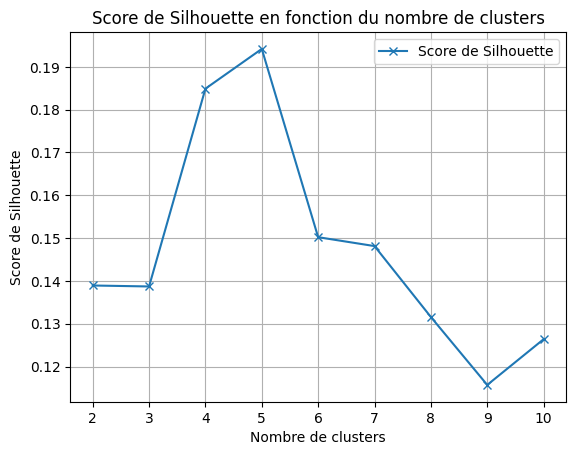

Le nombre de clusters k où le score est maximisé est: 5
Silhouette score pour chaque k: [0.1389214874584745, 0.13869380947065998, 0.18489306128522032, 0.1941759898654688, 0.1502049944086925, 0.14812667607601976, 0.13156218145082285, 0.11569924965202155, 0.12637481000274914]


5

In [17]:
cherche_nb_clusters(data, 10, graphe=True, verbose=True)

Après plusieurs exécutions, on se retrouve avec différents nombre de clusters. Pour finalement pouvoir déterminer ce nombre, on exécute plusieurs fois la fonction et on prend le résultat qui revient le plus souvent. Ici, on fait 10 exécutions :

In [18]:
ks=[]
for i in range(50):
    ks.append(cherche_nb_clusters(data, 10))

print(f"Le nombre de clusters qui ressort le plus souvent est: {np.argmax(np.bincount(ks))}")

Le nombre de clusters qui ressort le plus souvent est: 4


On va donc faire 4 clusters pour nos données.

In [19]:
def clustering_kmeans(data, df_original, n, affichage=False, annot=False):
    """ Effectue un clustering KMeans sur les données et affiche les résultats en 2D après réduction dimensionnelle avec PCA.
        Arguments :
            data (DataFrame) : données utilisées pour l'algorithme KMeans.
            df_original (DataFrame) : DataFrame d'origine où seront ajoutés les indices des clusters dans une noucelle colonne
            n (int) : nombre de clusters à utiliser
            affichage (bool) : mettre à True si on veut afficher un graphe en 2D des clusters
    """

    #Application de Kmeans avec n clusters
    kmeans=sklearn.cluster.KMeans(n_clusters=n, n_init='auto')
    clusters=kmeans.fit_predict(data)

    #Création de la colonne Cluster et ajout des indices de clusters correspondant à chaque personnage
    df_original['Cluster'] = clusters

    #Condition pour l'affichage
    if affichage:

        #Réduction des dimmensions à 2 pour pouvoir faire le graphe
        pca=PCA(n_components=2)
        data2D=pca.fit_transform(data)

        plt.figure(figsize=(8, 8))
        plt.scatter(data2D[:, 0], data2D[:, 1], c=kmeans.labels_)

        #Pour mettre les noms des personnages en annotation
        if annot:
            for label, x, y in zip(smash_names, data2D[:, 0], data2D[:, 1]):
                plt.annotate(label, xy=(x, y), xytext=(3, 1),textcoords='offset points', fontsize=7)
            
        plt.title(f'Clusters pour k={n}')
        plt.show()

    return kmeans

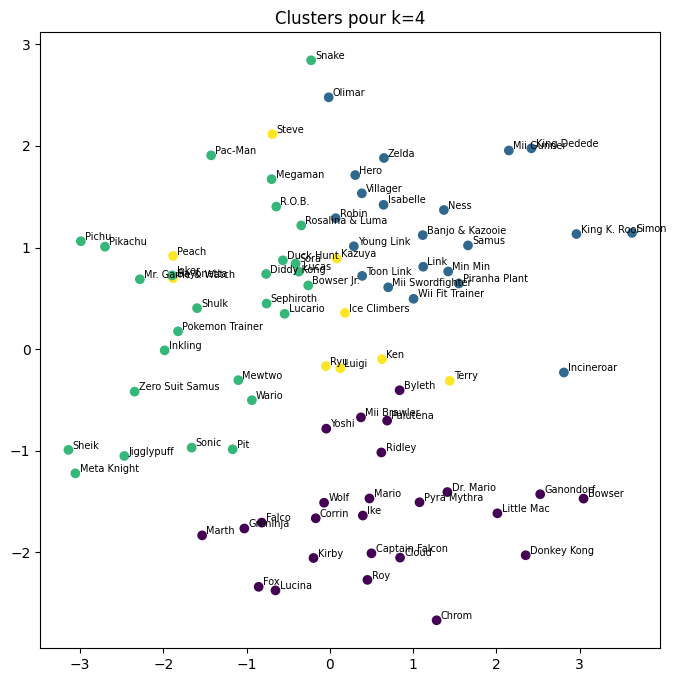

In [20]:
modele=clustering_kmeans(data, smash_c, 4, affichage=True, annot=True)

In [21]:
def dict_clusters(data):
    """ Crée un dictionnaire représentant les clusters obtenus.
        Argument :
            data (DataFrame) : données avec la colonne 'Cluster' pour pouvoir créer le dictionnaire
    """

    clusters_dict=dict()
    for i in data['Cluster']:
        tmp=data[data.Cluster==i]
        clusters_dict[i]=[tmp['name'].iloc[j] for j in range(len(tmp))] 

    return clusters_dict

In [22]:
cl=dict_clusters(smash_c)
for key in cl:
    print("Cluster ", key, " : ", cl[key])

Cluster  0  :  ['Mario', 'Donkey Kong', 'Yoshi', 'Kirby', 'Fox', 'Captain Falcon', 'Bowser', 'Dr. Mario', 'Falco', 'Lucina', 'Marth', 'Ganondorf', 'Roy', 'Chrom', 'Ike', 'Wolf', 'Little Mac', 'Greninja', 'Mii Brawler', 'Palutena', 'Cloud', 'Corrin', 'Ridley', 'Byleth', 'Pyra Mythra']
Cluster  1  :  ['Link', 'Samus', 'Ness', 'Zelda', 'Young Link', 'King Dedede', 'Olimar', 'Toon Link', 'Villager', 'Wii Fit Trainer', 'Mii Swordfighter', 'Mii Gunner', 'Robin', 'Simon', 'King K. Rool', 'Isabelle', 'Incineroar', 'Piranha Plant', 'Hero', 'Banjo & Kazooie', 'Min Min']
Cluster  2  :  ['Pikachu', 'Jigglypuff', 'Sheik', 'Pichu', 'Mewtwo', 'Mr. Game & Watch', 'Meta Knight', 'Pit', 'Zero Suit Samus', 'Wario', 'Snake', 'Pokemon Trainer', 'Diddy Kong', 'Lucas', 'Sonic', 'Lucario', 'R.O.B.', 'Megaman', 'Rosalina & Luma', 'Pac-Man', 'Shulk', 'Bowser Jr.', 'Duck Hunt', 'Inkling', 'Joker', 'Sephiroth', 'Sora']
Cluster  3  :  ['Luigi', 'Peach', 'Ice Climbers', 'Ryu', 'Ken', 'Bayonetta', 'Terry', 'Steve', 

# Partie Classification

Maintenant qu'on a nos clusters, on va effectuer une classification sur les données. D'abord, on récupère les données :

In [23]:
X=data.copy() #DataFrame qui sera utilisé pour la classification
X

,weight,speed,projectiles,edgeguard,cheese,recovery,combo_game,ledgetrap,easy
0,0.167414,0.275794,-0.660296,-0.445268,-0.575844,-0.671649,0.871944,-0.337012,-1.051999
1,2.331064,0.801727,-1.372720,-0.532617,0.147462,-1.613105,0.661652,0.430627,-1.251865
2,0.615066,-0.250139,1.476977,-0.619966,-0.937497,-0.200921,-1.020687,1.044739,0.371379
3,0.913501,-0.250139,1.476977,0.166177,-0.575844,0.269808,-1.441272,1.965906,-0.617982
4,0.615066,0.801727,-0.660296,-0.270569,-0.214191,0.740536,-0.179518,-0.490540,-0.931228
...,...,...,...,...,...,...,...,...,...
77,-0.280237,-1.827937,0.052129,-0.882014,1.594073,1.211264,1.082236,-0.490540,1.413873
78,-1.250149,-0.250139,0.052129,0.515573,0.147462,0.269808,-1.020687,-0.183485,0.033884
79,-0.056411,1.853593,-0.660296,-0.707315,0.870767,-1.142377,0.030774,0.277099,-1.527936
80,1.286544,-1.827937,-0.660296,-1.231410,1.594073,-0.200921,3.395452,-0.951124,1.813985


On aura aussi besoin de labels, ici ce sera le numéro de cluster :

In [24]:
Y=smash_c['Cluster'] #Labels pour la classification
Y

0     0
1     0
2     1
3     1
4     0
     ..
77    3
78    2
79    0
80    3
81    2
Name: Cluster, Length: 82, dtype: int32

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def classification_abd(data_train, data_test, label_train, label_test, features, plot=False):
    """ Entraine un arbre de décision avec les données et teste son accuracy avec des données tests
        Arguments :
            data (DataFrame) : données utilisées
            label (ndarray) : labels correspondants
            features (str[]) : noms des caractéristiques
            plot (bool) : True si on veut afficher l'arbre
    """
    arbre=tree.DecisionTreeClassifier()
    arbre=arbre.fit(data_train, label_train)

    ab_pred=arbre.predict(data_test)
    print("Accuracy:", sklearn.metrics.accuracy_score(label_test, ab_pred))

    if plot :
        plt.figure(figsize=(10,8))
        tree.plot_tree(arbre, feature_names=features)
        plt.savefig("./figures/arbre_decision.png")
        plt.show()

    return arbre, ab_pred


def classification_rf(data_train, data_test, label_train, label_test):
    """ Entraine un modèle random forest avec les données et teste son accuracy avec des données tests
        Arguments :
            data (DataFrame) : données utilisées
            label (ndarray) : labels correspondants
    """
    rf=RandomForestClassifier(n_estimators=150)

    rf.fit(data_train, label_train)
    rf_pred=rf.predict(data_test)
    print("Accuracy:", sklearn.metrics.accuracy_score(label_test, rf_pred))

    return rf, rf_pred

def val_croisee(modele, data, labels, nb):
    """ Fonction effectuant une validation croisée et affichant une courbe
        Arguments :
            modele : modèle d'apprentissage utilisé
            data (DataFrame) : données utilisées
            label (ndarray) : labels correspondants
            nb (int) : nombre d'itérations
    """
    scores = cross_val_score(modele, data, labels, cv=nb)
    for i in range(len(scores)):
        print(f"A l'itération {i+1}, l'accuracy est à : ", scores[i])
    plt.grid()
    plt.xlabel("Itération")
    plt.ylabel("Accuracy")
    plt.title("Accuracy à chaque itération")
    plt.plot(np.arange(0, len(scores)), scores, "x-")
    plt.show()

    return scores

def matrice_confusion(label_test, pred):
    """ Affiche la matrice de confusion correspondante
        Arguments :
            label_test (ndarray) : labels réels
            pred (ndarray) : labels obtenus avec le modèle

    """
    classes=label_test.unique()
    cm = confusion_matrix(label_test, pred, labels=classes)
    
    #Affichage de la matrice de confusion avec seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vrais Labels")
    plt.show()
    

On sépare les données en des ensembles d'entrainement et de test.

In [26]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3)

### Arbre de décision

D'abord, on teste une classification avec un simple arbre de décision :

Accuracy: 0.52


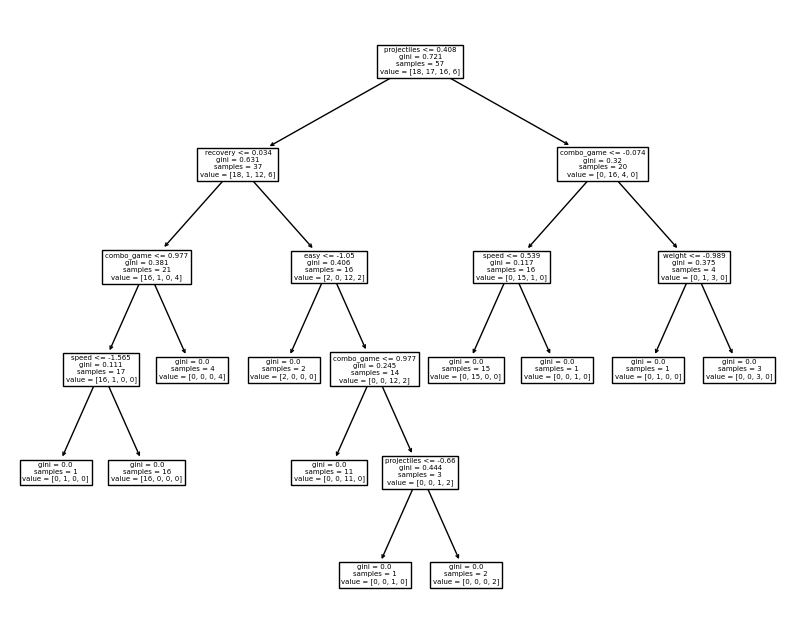

In [30]:
ab, ab_pred=classification_abd(X_train, X_test, Y_train, Y_test, X_train.columns, plot=True)

On affiche la matrice de confusion :

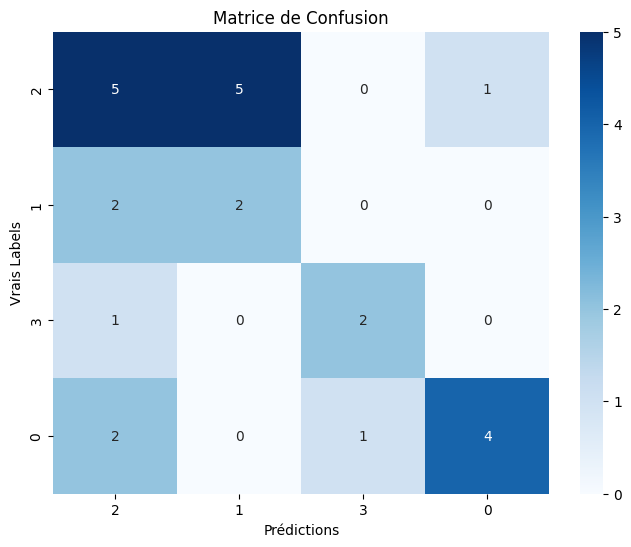

In [69]:
matrice_confusion(Y_test, ab_pred)

Et on fait une validation croisée à 5 itérations :

A l'itération 1, l'accuracy est à :  0.6470588235294118
A l'itération 2, l'accuracy est à :  0.7647058823529411
A l'itération 3, l'accuracy est à :  0.8125
A l'itération 4, l'accuracy est à :  0.875
A l'itération 5, l'accuracy est à :  0.75


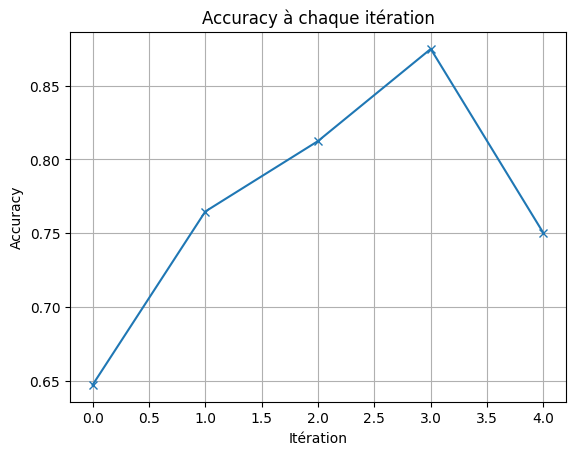

In [88]:
scores_ab=val_croisee(ab, X, Y, 5)

### Random Forest

On effectue les mêmes opérations mais cette fois-ci avec Random Forest :

In [41]:
rf, rf_pred=classification_rf(X_train, X_test, Y_train, Y_test)

Accuracy: 0.8


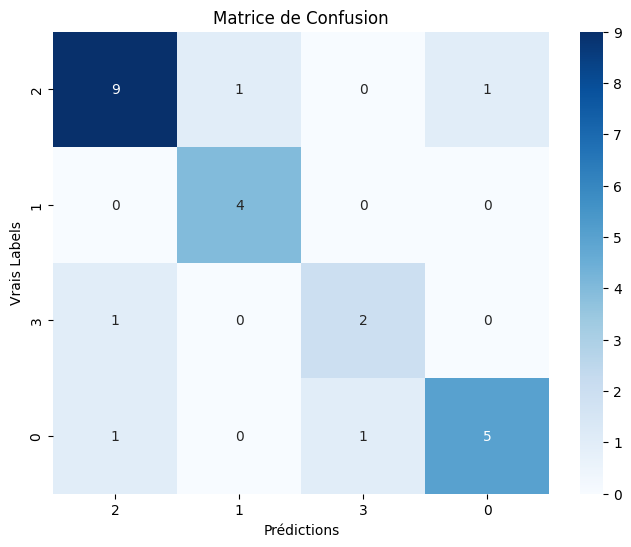

In [70]:
matrice_confusion(Y_test, rf_pred)

A l'itération 1, l'accuracy est à :  0.8823529411764706
A l'itération 2, l'accuracy est à :  0.8823529411764706
A l'itération 3, l'accuracy est à :  0.875
A l'itération 4, l'accuracy est à :  0.875
A l'itération 5, l'accuracy est à :  0.8125


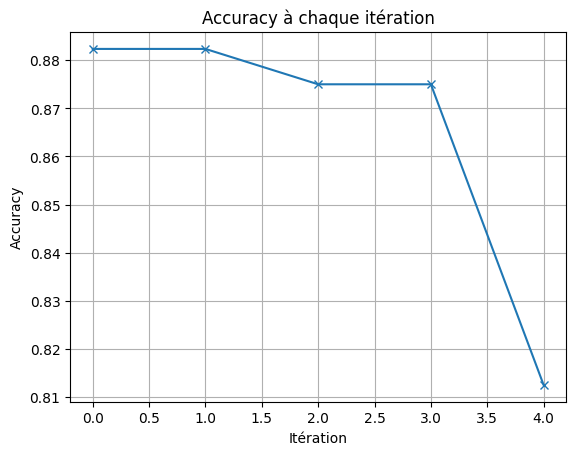

In [93]:
scores_rf=val_croisee(rf, X, Y, 5)

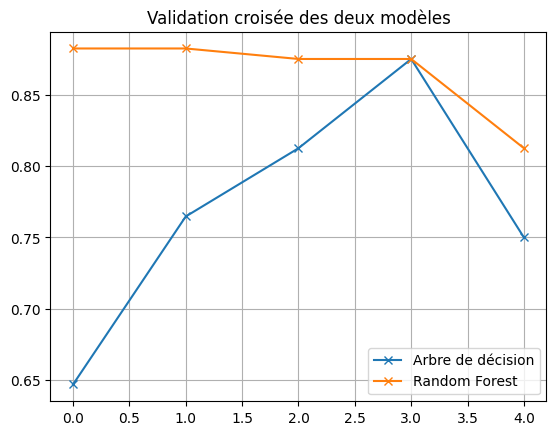

In [95]:
plt.grid()
plt.plot(np.arange(0, len(scores_ab)), scores_ab, "x-", label="Arbre de décision")
plt.plot(np.arange(0, len(scores_rf)), scores_rf, "x-", label="Random Forest")
plt.title("Validation croisée des deux modèles")
plt.legend()
plt.show()

On affiche un histogramme pour voir quelles features ont le plus d'impact lors des décisions des arbres.

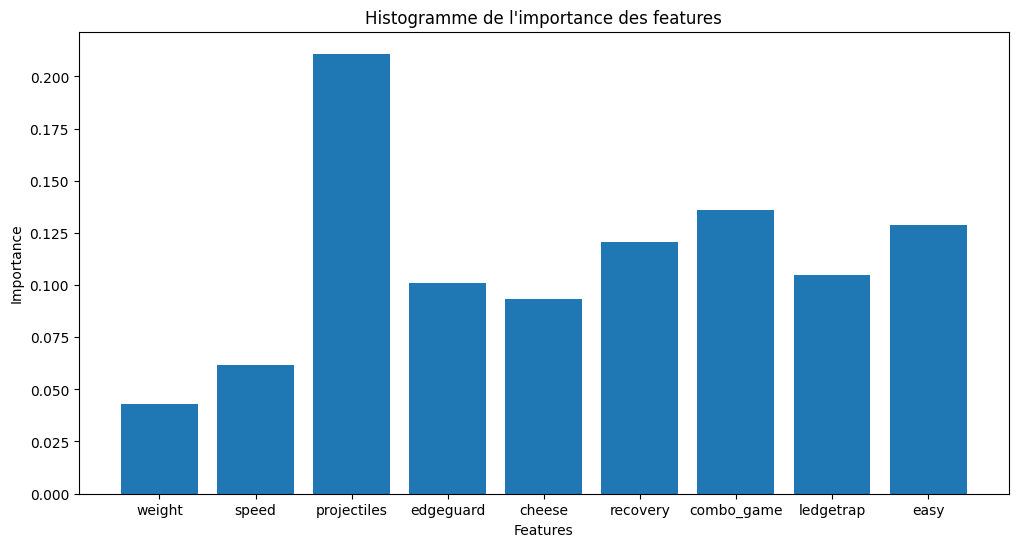

In [97]:
plt.figure(figsize=(12, 6))
plt.bar(rf.feature_names_in_, rf.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Histogramme de l'importance des features")
plt.show()